In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
(train, _), (test, _) = mnist.load_data()
train = train.astype('float32') / 255.
test = test.astype('float32') / 255.
train = train.reshape((len(train), np.prod(train.shape[1:])))
test = test.reshape((len(test), np.prod(test.shape[1:])))

Побудова моделі автокодувальника

In [ ]:
autoencoder = Sequential()
autoencoder.add(Dense(128, activation='relu', input_shape=(784,)))
autoencoder.add(Dense(64, activation='relu'))
autoencoder.add(Dense(32, activation='relu'))
autoencoder.add(Dense(64, activation='relu'))
autoencoder.add(Dense(128, activation='relu'))
autoencoder.add(Dense(784, activation='sigmoid'))

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

Навчання моделі

In [ ]:
history = autoencoder.fit(train, train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(test, test))

Epoch 1/50
235/235 [==============================] - 5s 16ms/step - loss: 0.2461 - val_loss: 0.1683
Epoch 2/50
235/235 [==============================] - 6s 24ms/step - loss: 0.1491 - val_loss: 0.1341
Epoch 3/50
235/235 [==============================] - 4s 15ms/step - loss: 0.1302 - val_loss: 0.1235
Epoch 4/50
235/235 [==============================] - 3s 15ms/step - loss: 0.1217 - val_loss: 0.1163
Epoch 5/50
235/235 [==============================] - 5s 19ms/step - loss: 0.1155 - val_loss: 0.1118
Epoch 6/50
235/235 [==============================] - 3s 15ms/step - loss: 0.1120 - val_loss: 0.1093
Epoch 7/50
235/235 [==============================] - 3s 14ms/step - loss: 0.1095 - val_loss: 0.1069
Epoch 8/50
235/235 [==============================] - 7s 28ms/step - loss: 0.1073 - val_loss: 0.1054
Epoch 9/50
235/235 [==============================] - 8s 35ms/step - loss: 0.1052 - val_loss: 0.1028
Epoch 10/50
235/235 [==============================] - 9s 39ms/step - loss: 0.1031 - val_lo

Графік функції втрат

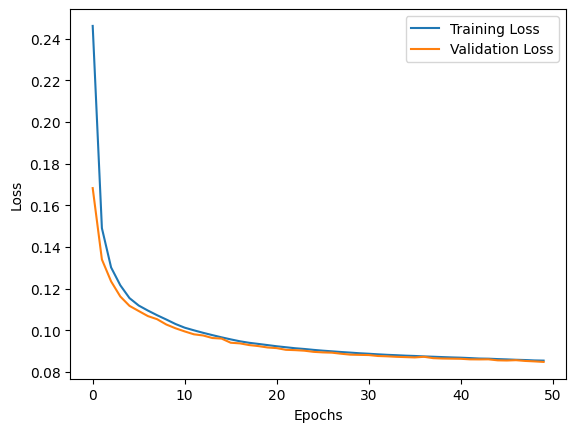

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Предикція та відображення результатів

313/313 [==============================] - 1s 2ms/step


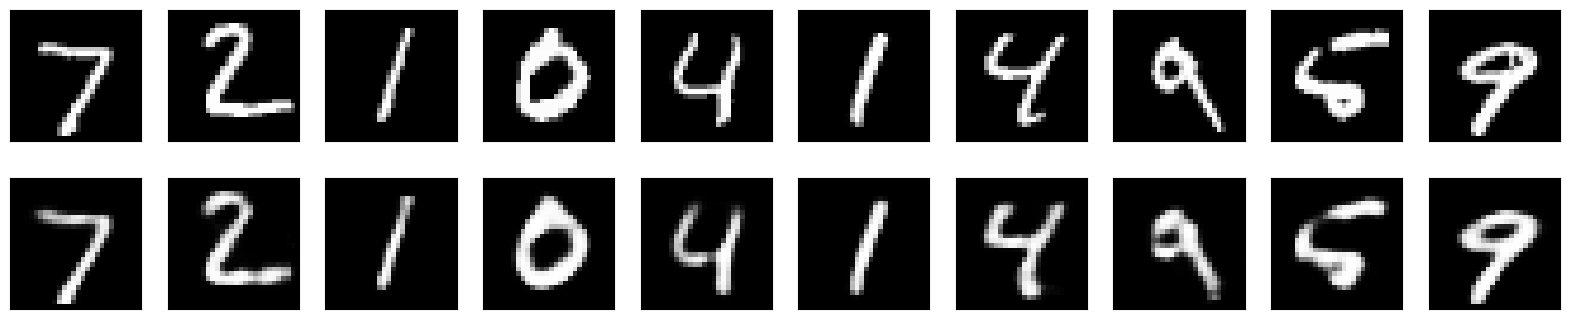

In [ ]:
decoded_imgs = autoencoder.predict(test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Оригінальне зображення
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Відновлене зображення
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Автокодувальник на основі багатошарової нейронної мережі дозволяє успішно відновлювати зображення рукописних цифр з датасету MNIST. Під час навчання моделі спостерігається зменшення функції втрат як на тренувальному, так і на валідаційному наборі даних, що свідчить про ефективність навчання. Відтворені зображення демонструють хорошу якість та відповідність оригінальним зображенням